In [1]:
from dataloader import Dataset, create_dataloader

c:\Users\CITY3\.conda\envs\i-jepaVENV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

from torchvision.transforms import Compose, Resize, Normalize, ToTensor, RandomResizedCrop, RandomHorizontalFlip, RandomVerticalFlip, ColorJitter
# Define transformations
transforms = Compose([
    # RandomResizedCrop(size=(256, 256), scale=(0.1, 0.25)),
    Resize((256, 256)), # Resize images
    RandomHorizontalFlip(), 
    RandomVerticalFlip(), 
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # value is chosen uniformly form [1-v, 1+v]
    # ToTensor(), # Convert images to tensors
    # Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize images
])

# Create the dataset
# dataset = Dataset(directory=directory, transform=transforms)


In [3]:
directory = r"D:\omer\poverty_mapping_data\clipped_data_survey"

# Create the DataLoader
dataloader = create_dataloader(directory, batch_size=8, transform=transforms, mode="survey")


c:\Users\CITY3\.conda\envs\i-jepaVENV\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


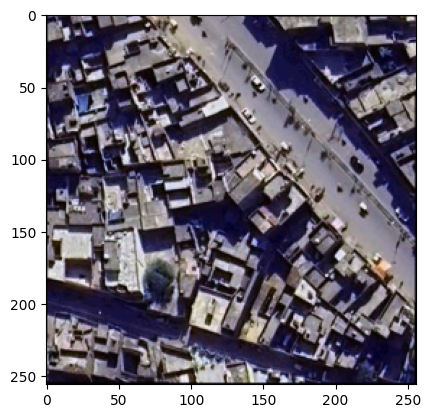

Label: tensor(0.4904, dtype=torch.float64)


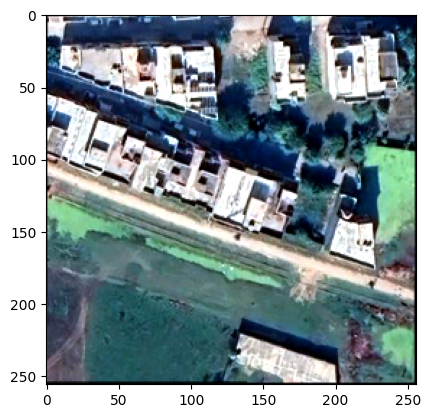

Label: tensor(0.5035, dtype=torch.float64)


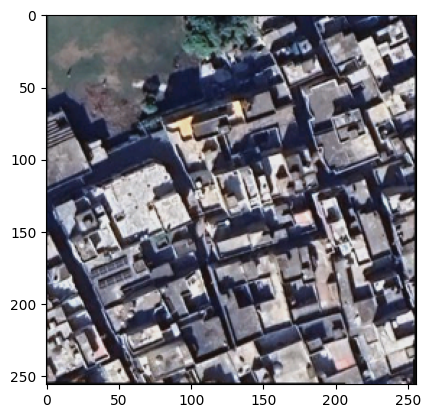

Label: tensor(0.5010, dtype=torch.float64)


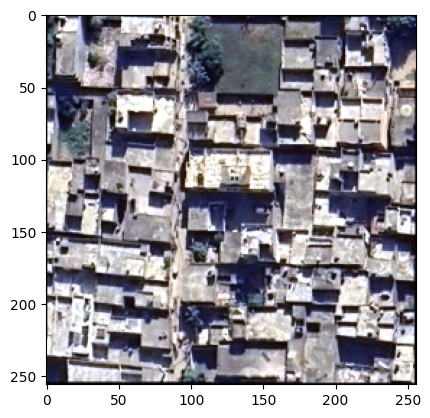

Label: tensor(0.6420, dtype=torch.float64)


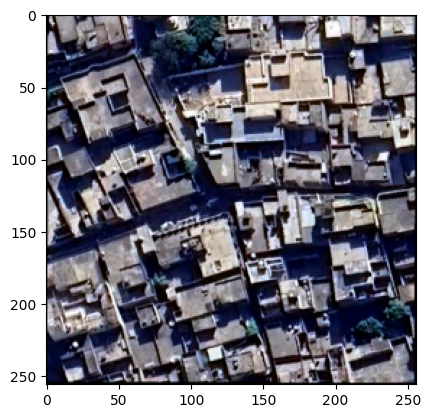

Label: tensor(0.5020, dtype=torch.float64)


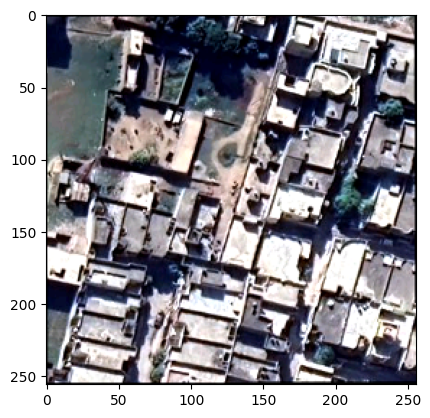

Label: tensor(0.3698, dtype=torch.float64)


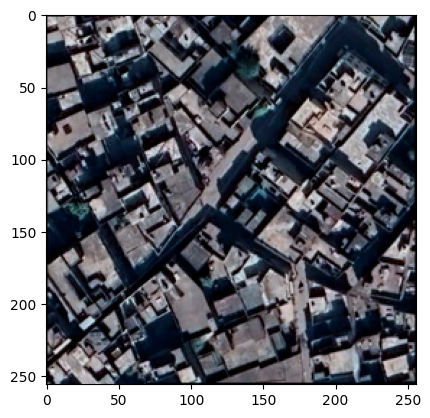

Label: tensor(0.5414, dtype=torch.float64)


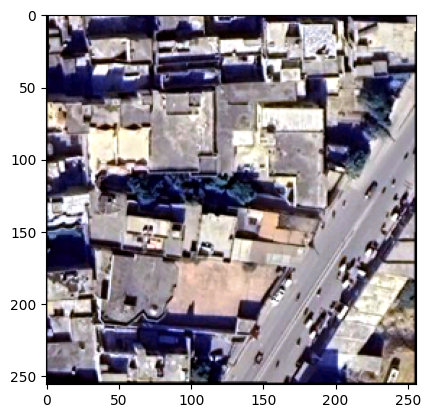

Label: tensor(0.5649, dtype=torch.float64)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to convert a torch.Tensor to numpy for plotting
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # Convert from torch [C, H, W] to numpy [H, W, C]
    mean = np.array([0.485, 0.456, 0.406])  # These values should match your normalization values
    std = np.array([0.229, 0.224, 0.225])   # These values should match your normalization values
    # img = std * img + mean                   # Unnormalize
    # img = np.clip(img, 0, 1)                # Clip values to [0, 1] range
    plt.imshow(img)
    plt.show()

for images, labels in dataloader:
    for i in range(len(images)):
        imshow(images[i])
        print("Label:", labels[i])
        
    break  


In [5]:
## class distribution

from collections import defaultdict
import os

def count_class_labels(directory):
    """
    Counts the number of instances for each class label in a given directory.

    Args:
        directory (str): The directory containing the image files.

    Returns:
        dict: A dictionary with class labels as keys and counts as values.
    """
    # Initialize a dictionary to hold the counts for each class label
    label_counts = defaultdict(int)

    # List all files in the given directory
    files = [f for f in os.listdir(directory) if f.endswith('.tif')]

    # Loop through each file, extract the class label, and update the count
    for file_name in files:
        # Assuming class label is the first element in the file name, separated by a comma
        class_label = int(file_name.split(',')[0].strip('('))
        label_counts[class_label] += 1

    return label_counts
count_class_labels(directory)


ValueError: invalid literal for int() with base 10: '0.0'